In [1]:
import pandas as pd

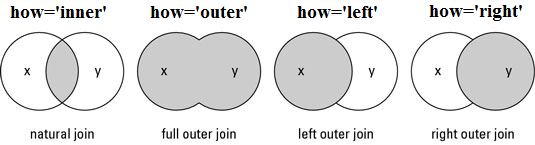

In [2]:

data1 = {
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32],
    'dfl' : ['left','left','left','left']
}

df1 = pd.DataFrame(data1)

data2 = {
    'ID': [3, 4, 5, 6],
    'Name': ['Charlie', 'David', 'Eve', 'Frank'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
    'dfr'  : ['right', 'right', 'right', 'right']
}

df2 = pd.DataFrame(data2)

print("DataFrame 1:")
display(df1)

print("DataFrame 2:")
display(df2)


DataFrame 1:


,ID,Name,Age,dfl
0,1,Alice,24,left
1,2,Bob,27,left
2,3,Charlie,22,left
3,4,David,32,left


DataFrame 2:


,ID,Name,City,dfr
0,3,Charlie,New York,right
1,4,David,Los Angeles,right
2,5,Eve,Chicago,right
3,6,Frank,Houston,right


In [ ]:
df1.merge(df2) # this means that df1 is left df and df2 is right df # be default its a inner join


,ID,Name,Age,dfl,City,dfr
0,3,Charlie,22,left,New York,right
1,4,David,32,left,Los Angeles,right


In [ ]:
df1.merge(df2, how='inner')

,ID,Name,Age,dfl,City,dfr
0,3,Charlie,22,left,New York,right
1,4,David,32,left,Los Angeles,right


In [ ]:
df1.merge(df2, how='inner', on='ID')

,ID,Name_x,Age,dfl,Name_y,City,dfr
0,3,Charlie,22,left,Charlie,New York,right
1,4,David,32,left,David,Los Angeles,right


In [ ]:
df1.merge(df2, how='inner', on=['ID','Name'])

,ID,Name,Age,dfl,City,dfr
0,3,Charlie,22,left,New York,right
1,4,David,32,left,Los Angeles,right


In [ ]:
df1.merge(df2, how = 'outer') #full join, everything from both the dataset

,ID,Name,Age,dfl,City,dfr
0,1,Alice,24.0,left,NaN,NaN
1,2,Bob,27.0,left,NaN,NaN
2,3,Charlie,22.0,left,New York,right
3,4,David,32.0,left,Los Angeles,right
4,5,Eve,NaN,NaN,Chicago,right
5,6,Frank,NaN,NaN,Houston,right


In [ ]:
display(df1)
display(df2)

,ID,Name,Age,dfl
0,1,Alice,24,left
1,2,Bob,27,left
2,3,Charlie,22,left
3,4,David,32,left


,ID,Name,City,dfr
0,3,Charlie,New York,right
1,4,David,Los Angeles,right
2,5,Eve,Chicago,right
3,6,Frank,Houston,right


In [ ]:

df1.merge(df2, how = 'left')

,ID,Name,Age,dfl,City,dfr
0,1,Alice,24,left,NaN,NaN
1,2,Bob,27,left,NaN,NaN
2,3,Charlie,22,left,New York,right
3,4,David,32,left,Los Angeles,right


In [ ]:
df1.merge(df2, how = 'right')

,ID,Name,Age,dfl,City,dfr
0,3,Charlie,22.0,left,New York,right
1,4,David,32.0,left,Los Angeles,right
2,5,Eve,NaN,NaN,Chicago,right
3,6,Frank,NaN,NaN,Houston,right


## JOIN

In [ ]:
df1.join(df2)

ValueError: columns overlap but no suffix specified: Index(['ID', 'Name'], dtype='object')

In [ ]:
df1.join(df2, on = 'ID', how = 'inner', lsuffix = '_Left',rsuffix = '_Right')


,ID,ID_Left,Name_Left,Age,dfl,ID_Right,Name_Right,City,dfr
0,1,1,Alice,24,left,4,David,Los Angeles,right
1,2,2,Bob,27,left,5,Eve,Chicago,right
2,3,3,Charlie,22,left,6,Frank,Houston,right


In [ ]:
df4 = df1.set_index('ID').join(df2.set_index('ID'), lsuffix = '_Left',rsuffix = '_Right', how = 'cross')
df4

In [ ]:
df1.join(df2, how = "cross")


In [ ]:
pd.concat([df1,df2])

,ID,Name,Age,dfl,City,dfr
0,1,Alice,24.0,left,NaN,NaN
1,2,Bob,27.0,left,NaN,NaN
2,3,Charlie,22.0,left,NaN,NaN
3,4,David,32.0,left,NaN,NaN
0,3,Charlie,NaN,NaN,New York,right
1,4,David,NaN,NaN,Los Angeles,right
2,5,Eve,NaN,NaN,Chicago,right
3,6,Frank,NaN,NaN,Houston,right


In [ ]:
df2